In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, AvgPool2D, Add, Dense 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.layers import Input,Dropout, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.initializers import glorot_uniform

import warnings
warnings.warn("ignore")
import os


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: ignore
  from ipykernel import kernelapp as app


**Import data from Drive into Notebook**

In [ ]:
from tqdm import tqdm
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Converting Image to Array**

1. Defining a function Convert to perform our required action
2. Using load_img to access images in the specified path and setting size 150 using target_size variable
3. Using img_to_array to convert images to array
4. Standardizing images by dividing them with 255 for easy computation
5. Appending all the scaled images into an array

In [ ]:
def convert(path,y):
    array=[]
    img_cat = []
    for img_path in tqdm(path):
        img = load_img(img_path, target_size=(150,150))
        img = img_to_array(img)
        img = img/255.
        array.append(img)
        img_cat.append(y)
    return np.array(array), np.array(img_cat)

**Accessing all trained images according to their categories**

1. Using glob to retrieve files in the specific path
2. Storing images of each categories in their specific names
3. Setting values starting from 0 to each categories available using convert function
4. Storing the converted images into trainX, trainY

In [ ]:
buildings = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/buildings/*')
trainX_building, trainY_building  = convert(buildings,0)

100%|██████████| 2191/2191 [21:39<00:00,  1.69it/s]


In [ ]:
print('train building shape ', trainX_building.shape, trainY_building.shape)

train building shape  (2191, 150, 150, 3) (2191,)


In [ ]:
forest = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/forest/*')
trainX_forest,trainY_forest  = convert(forest,1)


100%|██████████| 2271/2271 [22:30<00:00,  1.68it/s]


In [ ]:
glacier = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/glacier/*')
trainX_glacier,trainY_glacier  = convert(glacier,2)

100%|██████████| 2404/2404 [22:08<00:00,  1.81it/s]


In [ ]:
mount = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/mountain/*')
trainX_mount,trainY_mount  = convert(mount,3)

100%|██████████| 2512/2512 [23:42<00:00,  1.77it/s]


In [ ]:
sea = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/sea/*')
trainX_sea,trainY_sea  = convert(sea,4)

100%|██████████| 2274/2274 [22:15<00:00,  1.70it/s]


In [ ]:
street = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_train/street/*')
trainX_street,trainY_street  = convert(street,5)

100%|██████████| 2382/2382 [22:41<00:00,  1.75it/s]


**Checking the shape of data**

In [ ]:
print('train building shape ', trainX_building.shape, trainY_building.shape) 
print('train forest', trainX_forest.shape ,trainY_forest.shape)
print('train glacier', trainX_glacier.shape,trainY_glacier.shape)
print('train mountain', trainX_mount.shape, trainY_mount.shape)
print('train sea',     trainX_sea.shape, trainY_sea.shape)
print('train street', trainX_street.shape ,trainY_street.shape)

train building shape  (2191, 150, 150, 3) (2191,)
train forest (2271, 150, 150, 3) (2271,)
train glacier (2404, 150, 150, 3) (2404,)
train mountain (2512, 150, 150, 3) (2512,)
train sea (2274, 150, 150, 3) (2274,)
train street (2382, 150, 150, 3) (2382,)


**Concatenating all train categories**

1. Using concatenate function we are combining the trainX data of all categorical images into X_train
2. Combining trainY data of all images into Y_train

In [ ]:
X_train= np.concatenate((trainX_building,trainX_forest, trainX_glacier,trainX_mount, trainX_sea,trainX_street),axis=0)
y_train= np.concatenate((trainY_building,trainY_forest, trainY_glacier,trainY_mount, trainY_sea,trainY_street),axis=0)

In [ ]:
X_train.shape

(14034, 150, 150, 3)

In [ ]:
X_train.dtype

dtype('float32')

**Saving the data into drive in npy format**

In [ ]:
from numpy import save

save('X_train.npy', X_train)

In [ ]:
!cp X_train.npy "/content/drive/My Drive/data/Intel_Image_Classification/"

In [ ]:
from numpy import load

X_train = load('/content/drive/My Drive/data/Intel_Image_Classification/X_train1.npy.npz')



In [ ]:
X_train = X_train['arr_0']

In [ ]:
X_train.dtype

dtype('float32')

In [ ]:
X_train.shape

(14034, 150, 150, 3)

In [ ]:
from numpy import load

y_train = load('/content/drive/My Drive/data/Intel_Image_Classification/y_train.npy')


In [ ]:
y_train.shape

(14034,)

**Converting test data**

1. Using the similar steps as performed for train data
2. Accessing test data of each categories using glob function
3. Storing them in their respective variables

In [ ]:
buildings_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/buildings/*')
testX_building, testY_building  = convert(buildings_test,0)

100%|██████████| 437/437 [04:59<00:00,  1.46it/s]


In [ ]:
forest_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/forest/*')
testX_forest, testY_forest  = convert(forest_test,1)

In [ ]:
glacier_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/glacier/*')
testX_glacier, testY_glacier  = convert(glacier_test,2)

In [ ]:
mountain_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/mountain/*')
testX_mountain, testY_mountain  = convert(mountain_test,3)

In [ ]:
sea_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/sea/*')
testX_sea, testY_sea  = convert(sea_test,4)

In [ ]:
street_test = glob.glob('/content/drive/My Drive/data/Intel_Image_Classification/seg_test/street/*')
testX_street, testY_street  = convert(street_test,5)

**Concatenating all Test data**

In [ ]:
X_test= np.concatenate((testX_building,testX_forest, testX_glacier,testX_mountain, testX_sea,testX_street),axis=0)
y_test= np.concatenate((testY_building,testY_forest, testY_glacier,testY_mountain, testY_sea,testY_street),axis=0)

In [ ]:
from numpy import save

save('X_test.npy', X_test)

In [ ]:
!cp X_test.npy "/content/drive/My Drive/data/Intel_Image_Classification/"

In [ ]:
from numpy import save

save('y_test.npy', y_test)

In [ ]:
!cp y_test.npy "/content/drive/My Drive/data/Intel_Image_Classification/"

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14034, 150, 150, 3), (3000, 150, 150, 3), (14034,), (3000,))

**Converting label data to one-hot vector** 

1. We use to_categorical to convert our array into one-hot encoded vectors
2. We encode both y_train and y_test

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape,y_test.shape
y_test[1]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

**RESNET50** **with inbuilt pretrained weights by the imagenet**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

1. Applying the state-of-the-art algorithm ResNet50 for our data by simply specifying ResNet50 for the input data
2. We take pretrained weights from the imagenet
3. We use include_top= False to modify output according to our requirement

In [ ]:
resnet = ResNet50(input_shape= (150, 150, 3), weights='imagenet', include_top=False )

1. We use layer.trainable=False to avoid training of the whole dataset since they are already trained
2. We directly use the model without training it

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnet.trainable = False

1. Since the softmax is applied on 1D , we Flatten the data that is obtained from above layers using Flatten function

In [ ]:
x = Flatten()(resnet.output)

1. Dense function is used to get a fully connected layer
2. Activation is applied as Softmax as value is given as 6, indicating the number of categories our data belong to

In [ ]:
prediction = Dense(6, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
   

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

1. Categorical crossentropy is used as loss function since it is single label catgorization i.e., each image belongs to only one category
2. Adam optimizer is used for better optimization
3. We are using accuracy as a metric for evaluation 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Fitting data to our model**

1. We use fit function to fit our training and test data for our ResNet model
2. We specify number of epochs as 50 for better stability in accuracy
3. Validation data is given as our test data
4. Batch size can be of any size ie., 32 or 64 depending upon our data

In [ ]:
r = model.fit(X_train, y_train, epochs = 50, batch_size = 64,validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
220/220 [==============================] - 61s 276ms/step - loss: 1.2562 - accuracy: 0.5219 - val_loss: 1.0763 - val_accuracy: 0.5677
Epoch 2/50
220/220 [==============================] - 58s 265ms/step - loss: 0.9449 - accuracy: 0.6312 - val_loss: 1.0897 - val_accuracy: 0.5737
Epoch 3/50
220/220 [==============================] - 58s 265ms/step - loss: 0.8860 - accuracy: 0.6514 - val_loss: 0.8790 - val_accuracy: 0.6587
Epoch 4/50
220/220 [==============================] - 58s 265ms/step - loss: 0.7925 - accuracy: 0.7001 - val_loss: 0.8747 - val_accuracy: 0.6780
Epoch 5/50
220/220 [==============================] - 58s 265ms/step - loss: 0.8010 - accuracy: 0.6895 - val_loss: 0.8351 - val_accuracy: 0.6637
Epoch 6/50
220/220 [==============================] - 58s 265ms/step - loss: 0.7432 - accuracy: 0.7141 - val_loss: 0.8328 - val_accuracy: 0.6710
Epoch 7/50
220/220 [==============================] - 58s 265ms/step - loss: 0.7262 - accuracy: 0.7197 - val_loss: 0.8102 - val_ac

**Evaluating performance of our model**

1. We use evaluate function to test accuracy of our test data on our trained model


In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 11s 122ms/step - loss: 0.7761 - accuracy: 0.7363


[0.776053249835968, 0.7363333106040955]

**OBSERVATION**

1. We got an accuracy of 73.63 using ResNet50 as our model
2. We obtained loss of 0.7761 which shows moderate performance of ResNet50 on our data

**VGG16** **with inbuilt pretrained images by imagenet**


In [ ]:
from keras.applications import VGG16

Using TensorFlow backend.


1. Using VGG16 model for our data
2. Using pretrained weights of images by imagenet
3. Specifying include_top=False to modify output layer according to our requirements

In [ ]:
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 5s 0us/step


In [ ]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

1. Models.Sequential is used to define the beginning of our model
2. We add vgg_conv which has our predeined VGG16 layers
3. We flatten the data before using softmax since it accepts 1D as input
4. We use dropout to avoid overfitting of data 
5. Activation function is used as softmax as value is specified as 6 , since we have 6 categorical images

In [ ]:
from keras import models as Models
from keras import layers as Layers
model1=Models.Sequential()
model1.add(vgg_conv)
model1.add(Layers.Flatten())
model1.add(Layers.Dense(180,activation='relu'))
model1.add(Layers.Dense(100,activation='relu'))
model1.add(Layers.Dense(50,activation='relu'))
model1.add(Layers.Dropout(rate=0.5))
model1.add(Layers.Dense(6,activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 180)               1474740   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               18100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

Similar to ResNet50, we donot train the VGG16 layers since it is already trained thus we use .trainable=False

In [ ]:
vgg_conv.trainable=False

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

1. Using Catrgorical cross entropy as loss since data is single value category
2. We use Adam optimizer as it yields better optimization results
3. Metrics used to evaluate the performance of model is Accuracy

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Fitting Train data to our model**

In [ ]:
vgg_model = model1.fit(X_train, y_train, epochs = 50, batch_size = 64,validation_data=(X_test, y_test), shuffle=True)

Train on 14034 samples, validate on 3000 samples
Epoch 1/50
14034/14034 [==============================] - 82s 6ms/step - loss: 0.6791 - accuracy: 0.7575 - val_loss: 0.3614 - val_accuracy: 0.8690
Epoch 2/50
14034/14034 [==============================] - 75s 5ms/step - loss: 0.4065 - accuracy: 0.8653 - val_loss: 0.3673 - val_accuracy: 0.8623
Epoch 3/50
14034/14034 [==============================] - 75s 5ms/step - loss: 0.3289 - accuracy: 0.8897 - val_loss: 0.3698 - val_accuracy: 0.8677
Epoch 4/50
14034/14034 [==============================] - 75s 5ms/step - loss: 0.2926 - accuracy: 0.9012 - val_loss: 0.3342 - val_accuracy: 0.8850
Epoch 5/50
14034/14034 [==============================] - 75s 5ms/step - loss: 0.2453 - accuracy: 0.9169 - val_loss: 0.3928 - val_accuracy: 0.8770
Epoch 6/50
14034/14034 [==============================] - 75s 5ms/step - loss: 0.2152 - accuracy: 0.9272 - val_loss: 0.3795 - val_accuracy: 0.8810
Epoch 7/50
14034/14034 [==============================] - 75s 5ms/ste

**Graph For Model Accuracy**

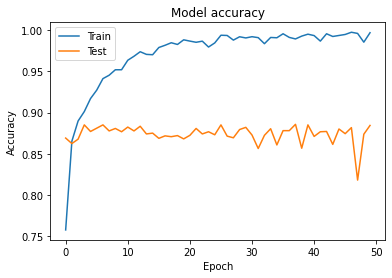

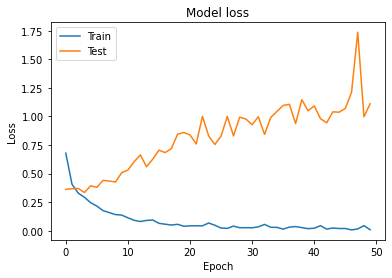

In [ ]:
plt.plot(vgg_model.history['accuracy'])
plt.plot(vgg_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(vgg_model.history['loss'])
plt.plot(vgg_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model1.evaluate(X_test, y_test)

3000/3000 [==============================] - 18s 6ms/step


[1.1111877498591203, 0.8843333125114441]

Pretty Table 

In [2]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Train Loss", "Test Loss", "Train Accuracy", "Test Accuracy"]

x.add_row(["Resnet50",0.449,0.776,83.5,73.6])
x.add_row(["VGG16",0.008,1.111,99.6,88.4])


In [3]:
print(x)

+----------+------------+-----------+----------------+---------------+
|  Model   | Train Loss | Test Loss | Train Accuracy | Test Accuracy |
+----------+------------+-----------+----------------+---------------+
| Resnet50 |   0.449    |   0.776   |      83.5      |      73.6     |
|  VGG16   |   0.008    |   1.111   |      99.6      |      88.4     |
+----------+------------+-----------+----------------+---------------+
